# Laboratory practice № 7 (Controlability and observability)

Done by Zolotarev Dmitriy (isu: 311791, group: R33353)

Variant: 2

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter
import scipy

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
dt = 0.001

In [3]:
t = sympy.symbols("t",real=True)

In [4]:
def grammian_cont(a, b, t_1):
    return sympy.integrate(
        sympy.exp(a*t) @ b @ b.T @ sympy.exp(a.T*t),
        (t,0,t_1)
    )

In [5]:
def grammian_obs_sym(a, c, t_1):
    return sympy.integrate(sympy.exp(a.T*t) @ c.T @ c @ sympy.exp(a*t),(t,0,t_1))

def grammian_obs_sci(a, c, t_1):
    func = lambda x : scipy.linalg.expm(a.T*x) @ c.T @ c @ scipy.linalg.expm(a*x)
    return scipy.integrate.quad_vec(func,0,t_1)

## Task 1

In [6]:
A = np.array([
    [1, -2, 3],
    [2, -3, 2],
    [-2, 1, -4]
])

B = np.array([
    [-3],
    [-1],
    [3]
])

x_1 = np.array([
    [4],
    [3],
    [-3]
])

### subtask 1

In [7]:
U = np.concatenate([B, A.dot(B), A.dot(A.dot(B))],axis=1)
U

array([[ -3,   8, -19],
       [ -1,   3,  -7],
       [  3,  -7,  15]])

In [8]:
np.linalg.matrix_rank(U)

3

Rank of controllability matrix is n, so the system is fully controllable

### subtask 2

In [9]:
A_sym = sympy.Matrix(A)
B_sym = sympy.Matrix(B)
P, J = A_sym.jordan_form()
J

Matrix([
[-2,      0,      0],
[ 0, -2 - I,      0],
[ 0,      0, -2 + I]])

In [10]:
P

Matrix([
[-1, -3/2 + I/2, -3/2 - I/2],
[ 0,         -1,         -1],
[ 1,          1,          1]])

In [11]:
lambdas = A_sym.eigenvals().keys()
lambdas 

dict_keys([-2, -2 - I, -2 + I])

In [12]:
P**(-1) @ A_sym @ P # is equal to J

Matrix([
[-2,                                      0,                                      0],
[ 0, -5/2 + (-3/2 + I/2)*(-1 + 2*I) + 5*I/2, -5/2 + (-3/2 - I/2)*(-1 + 2*I) + 5*I/2],
[ 0, -5/2 - 5*I/2 + (-3/2 + I/2)*(-1 - 2*I), -5/2 - 5*I/2 + (-3/2 - I/2)*(-1 - 2*I)]])

Method 1 (rank criterion):

In [13]:
lambdas = [-2, -2-1j, -2+1j]

for lambda_ in lambdas:
    rank = np.linalg.matrix_rank(
        np.concatenate(
            [(A - lambda_ * np.identity(3)), B],
            axis=1)
        )
    print(rank)

3
3
3


Method 2 (Jordan representation)

In [14]:
J

Matrix([
[-2,      0,      0],
[ 0, -2 - I,      0],
[ 0,      0, -2 + I]])

In [15]:
P.inv() @ B_sym

Matrix([
[        2],
[1/2 - I/2],
[1/2 + I/2]])

### subtask 3
A, B - fully controllable, so x_1 is in controllable space

### subtask 4

In [16]:
G_cont = grammian_cont(A_sym,B_sym,3)
G_cont.simplify()
G_cont

Matrix([
[ -exp(-12) - exp(-12)*cos(3)**2/8 + exp(-12)*sin(3)*cos(3)/2 - 9*exp(-12)*sin(3)**2/8 + 36*exp(-12)*sin(3)/17 - 8*exp(-12)*cos(3)/17 + 217/136,        -exp(-12)*cos(3)**2/8 + exp(-12)*sin(3)*cos(3)/2 - 5*exp(-12)*sin(3)**2/8 + 10*exp(-12)*sin(3)/17 - 6*exp(-12)*cos(3)/17 + 65/136,       -233/136 + 10*exp(-12)*cos(3)/17 - 28*exp(-12)*sin(3)/17 + 5*exp(-12)*sin(3)**2/8 - exp(-12)*sin(3)*cos(3)/2 + exp(-12)*cos(3)**2/8 + exp(-12)],
[             -exp(-12)*cos(3)**2/8 + exp(-12)*sin(3)*cos(3)/2 - 5*exp(-12)*sin(3)**2/8 + 10*exp(-12)*sin(3)/17 - 6*exp(-12)*cos(3)/17 + 65/136,                                                   -3*exp(-12)*cos(3)**2/20 + 2*exp(-12)*sin(3)*cos(3)/5 - 7*exp(-12)*sin(3)**2/20 + 3/20,             -171/340 + 6*exp(-12)*cos(3)/17 - 10*exp(-12)*sin(3)/17 + 7*exp(-12)*sin(3)**2/20 - 2*exp(-12)*sin(3)*cos(3)/5 + 3*exp(-12)*cos(3)**2/20],
[-233/136 + 10*exp(-12)*cos(3)/17 - 28*exp(-12)*sin(3)/17 + 5*exp(-12)*sin(3)**2/8 - exp(-12)*sin(3)*cos(3)/2 + exp(-12)*co

In [17]:
G_cont.evalf()

Matrix([
[1.59558547010647,    0.4779425749522,   -1.7132328976916],
[ 0.4779425749522,  0.149998710538294, -0.502942543894631],
[-1.7132328976916, -0.502942543894631,   1.85588023303862]])

In [18]:
G_cont.evalf().eigenvals().keys()

dict_keys([0.000173898183394328, 0.0172311352739937, 3.58405938022599])

In [19]:
G_cont.evalf().det()

1.07395017596712e-5

### subtask 5

In [20]:
x_1_sym = sympy.Matrix(x_1)
x_1_sym

Matrix([
[ 4],
[ 3],
[-3]])

In [21]:
u = B_sym.T @ sympy.exp(A_sym.T * (3 - t)) @ G_cont.evalf().inv() @ x_1_sym
u

Matrix([[669.248474299927*exp(2*t - 6)*sin(t - 3) - 1578.60739157122*exp(2*t - 6)*cos(t - 3) + 1643.23823004988*exp(2*t - 6)]])

### subtask 6

In [22]:
u_f = lambdify(t,u[0,0],'numpy')

In [23]:
x_1

array([[ 4],
       [ 3],
       [-3]])

In [24]:
system = ctrl.ss(A,B,[0,0,0],0)
system

StateSpace(array([[ 1., -2.,  3.],
       [ 2., -3.,  2.],
       [-2.,  1., -4.]]), array([[-3.],
       [-1.],
       [ 3.]]), array([[0., 0., 0.]]), array([[0.]]))

In [25]:
time_1 = np.linspace(0,3,int(3/dt))
u_s = u_f(time_1)
sys_out = ctrl.forced_response(system,U=u_s,X0=0,T=time_1)

In [26]:
sys_out.states[:,-1]

array([ 3.99984536,  2.99995067, -2.99983905])

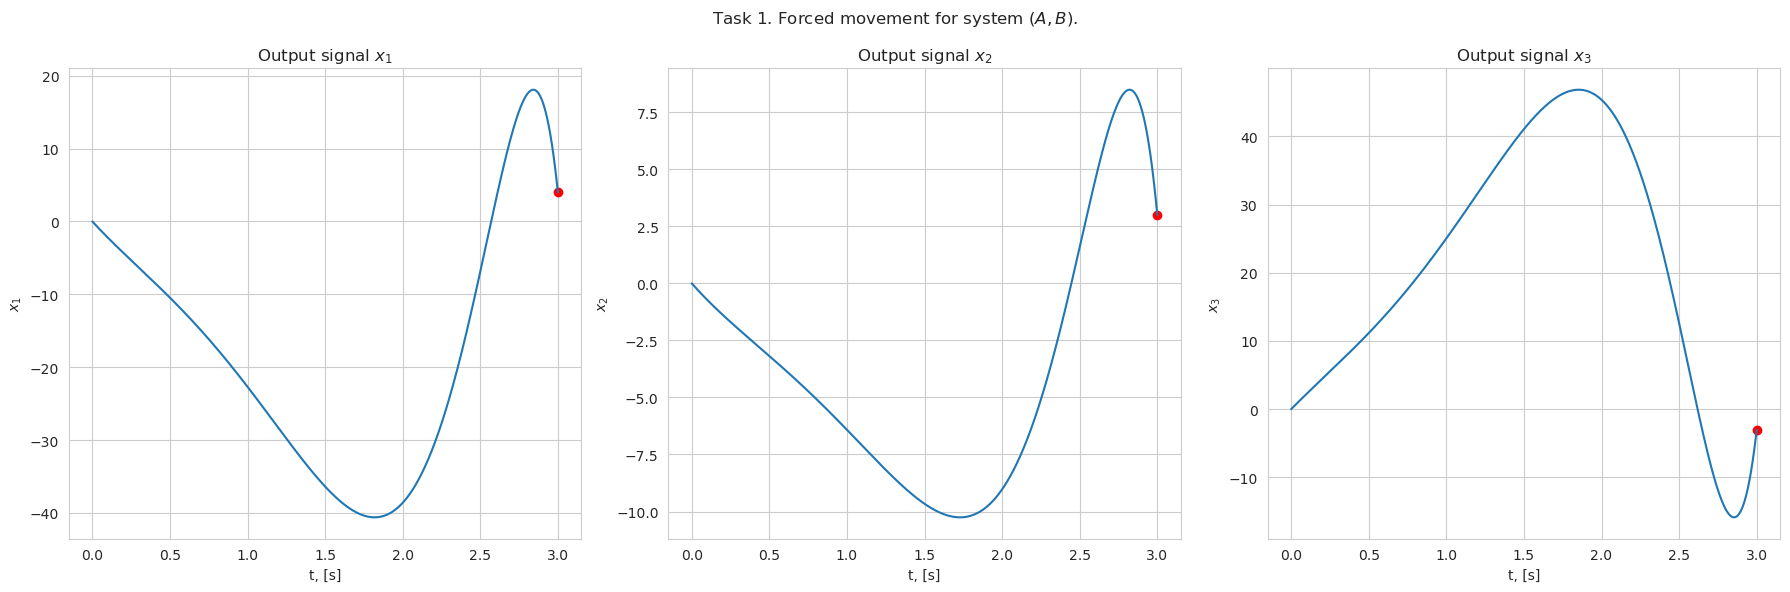

In [114]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 1. Forced movement for system $(A, B)$.")

for j in range(3):
    ax[j].plot(time_1, sys_out.states[j,:])
    ax[j].set_ylabel(f"$x_{j+1}$")
    ax[j].set_xlabel("t, [s]")
    ax[j].grid(True)
    ax[j].scatter(3, x_1[j][0], color='red')
    # Annotating the point

    ax[j].set_title(f"Output signal $x_{j+1}$")
plt.tight_layout()

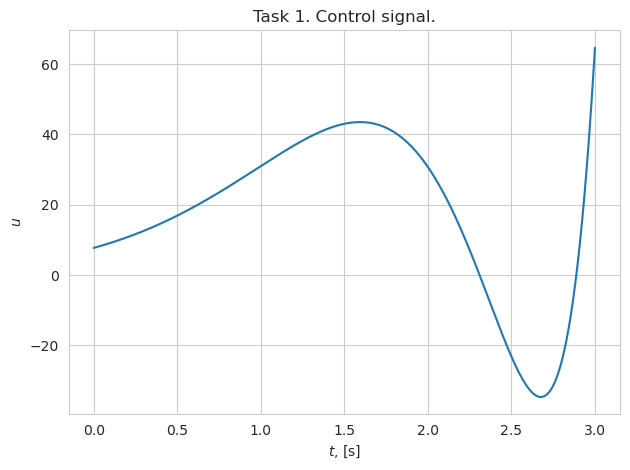

In [28]:
plt.plot(time_1,u_s)
plt.title("Task 1. Control signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$u$")
plt.grid(True)
plt.tight_layout()

## Task 2

In [29]:
A = np.array([
    [1, -2, 3],
    [2, -3, 2],
    [-2, 1, -4],
])

B = np.array([
    [3],
    [1],
    [-1]
])

x_1_hat = np.array([
    [4],
    [3],
    [-3]
])

x_2_hat = np.array([
    [3],
    [3],
    [-2]
])

### subtask 1

In [30]:
U = np.concatenate([B, A.dot(B), A.dot(A.dot(B))],axis=1)
U

array([[ 3, -2, -7],
       [ 1,  1, -9],
       [-1, -1,  9]])

In [31]:
np.linalg.matrix_rank(U)

2

In [32]:
lambdas = [-2, -2-1j, -2+1j]

for lambda_ in lambdas:
    rank = np.linalg.matrix_rank(
        np.concatenate(
            [(A - lambda_ * np.identity(3)), B],
            axis=1)
        )
    print(rank)

2
3
3


x_1_hat is in controllable subspace

### subtask 2

In [33]:
A_sym = sympy.Matrix(A)
B_sym = sympy.Matrix(B)
P, J = A_sym.jordan_form()
J

Matrix([
[-2,      0,      0],
[ 0, -2 - I,      0],
[ 0,      0, -2 + I]])

method 1 (rank creterion)

In [34]:
P

Matrix([
[-1, -3/2 + I/2, -3/2 - I/2],
[ 0,         -1,         -1],
[ 1,          1,          1]])

In [35]:
np.linalg.matrix_rank(np.concatenate([A-(-2)*np.identity(3),B],axis=1))

2

In [36]:
np.linalg.matrix_rank(np.concatenate([A-(-2-j)*np.identity(3),B],axis=1))

3

In [37]:
np.linalg.matrix_rank(np.concatenate([A-(-2+j)*np.identity(3),B],axis=1))

3

method 2 (Jordan representation)

In [38]:
J

Matrix([
[-2,      0,      0],
[ 0, -2 - I,      0],
[ 0,      0, -2 + I]])

In [39]:
P.inv() @ B

Matrix([
[           0],
[-1/2 - 3*I/2],
[-1/2 + 3*I/2]])

-1 is non controllable

### subtask 3

we have chosen x_1 to be in controllable space

### subtask 4

In [40]:
G_cont_2 = grammian_cont(A_sym,B_sym,3)
G_cont_2.simplify()
G_cont_2

Matrix([
[-29*exp(-12)*cos(3)**2/8 - 21*exp(-12)*sin(3)**2/8 - 11*exp(-12)*sin(3)*cos(3)/2 + 29/8, -13*exp(-12)*cos(3)**2/8 - 17*exp(-12)*sin(3)**2/8 - 7*exp(-12)*sin(3)*cos(3)/2 + 13/8, -13/8 + 7*exp(-12)*sin(3)*cos(3)/2 + 17*exp(-12)*sin(3)**2/8 + 13*exp(-12)*cos(3)**2/8],
[ -13*exp(-12)*cos(3)**2/8 - 17*exp(-12)*sin(3)**2/8 - 7*exp(-12)*sin(3)*cos(3)/2 + 13/8,      -3*exp(-12)*cos(3)**2/4 - 7*exp(-12)*sin(3)**2/4 - 2*exp(-12)*sin(3)*cos(3) + 3/4,      -3/4 + 2*exp(-12)*sin(3)*cos(3) + 7*exp(-12)*sin(3)**2/4 + 3*exp(-12)*cos(3)**2/4],
[ -13/8 + 7*exp(-12)*sin(3)*cos(3)/2 + 17*exp(-12)*sin(3)**2/8 + 13*exp(-12)*cos(3)**2/8,      -3/4 + 2*exp(-12)*sin(3)*cos(3) + 7*exp(-12)*sin(3)**2/4 + 3*exp(-12)*cos(3)**2/4,      -3*exp(-12)*cos(3)**2/4 - 7*exp(-12)*sin(3)**2/4 - 2*exp(-12)*sin(3)*cos(3) + 3/4]])

In [41]:
G_cont_2.evalf()

Matrix([
[ 3.62498257075876,   1.62499295885364,  -1.62499295885364],
[ 1.62499295885364,  0.749996986267782, -0.749996986267782],
[-1.62499295885364, -0.749996986267782,  0.749996986267782]])

In [42]:
G_cont_2.evalf().eigenvals().keys()

dict_keys([5.09430547837684, 0.0306710649174794, -5.24930150082934e-64])

In [43]:
G_cont_2.evalf().det()

2.22044604925031e-16

### subtask 5

In [44]:
x_1_sym_2 = sympy.Matrix(x_1_hat)
x_1_sym_2

Matrix([
[ 4],
[ 3],
[-3]])

In [45]:
u_2 = B_sym.T @ sympy.exp(A_sym.T * (3 - t)) @ G_cont_2.evalf().pinv() @ x_1_sym_2
u_2

Matrix([[-72.0005637110798*exp(2*t - 6)*sin(t - 3) - 16.0001884866956*exp(2*t - 6)*cos(t - 3)]])

### subtask 6

In [46]:
u_f_2 = lambdify(t,u_2[0,0],'numpy')

In [47]:
system_2 = ctrl.ss(A,B,[0,0,0],0)
system_2

StateSpace(array([[ 1., -2.,  3.],
       [ 2., -3.,  2.],
       [-2.,  1., -4.]]), array([[ 3.],
       [ 1.],
       [-1.]]), array([[0., 0., 0.]]), array([[0.]]))

In [48]:
time_2 = np.linspace(0,3,int(3/dt))
u_s_2 = u_f_2(time_2)
sys_out_2 = ctrl.forced_response(system_2,U=u_s_2,X0=0,T=time_2)

In [49]:
sys_out_2.states[:,-1]

array([ 3.99997865,  2.99999108, -2.99999108])

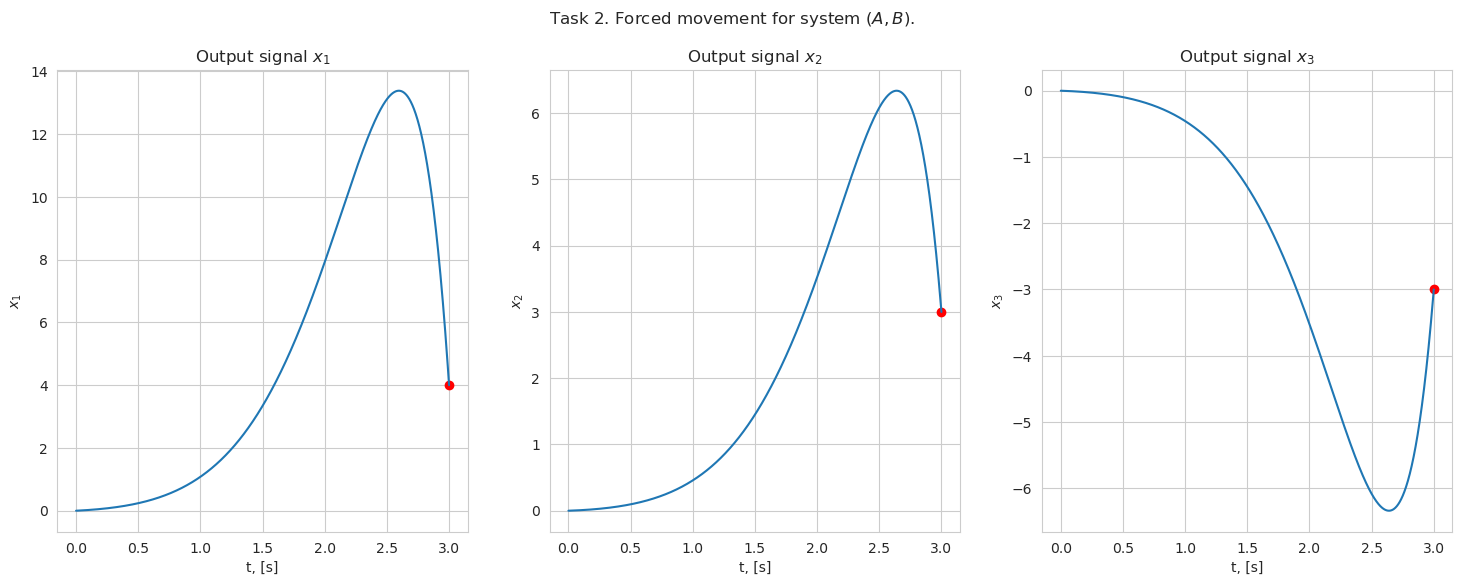

In [115]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 2. Forced movement for system $(A, B)$.")

for j in range(3):
    ax[j].plot(time_2, sys_out_2.states[j,:])
    ax[j].set_ylabel(f"$x_{j+1}$")
    ax[j].set_xlabel("t, [s]")
    ax[j].grid(True)
    ax[j].scatter(3, x_1[j][0], color='red')
    ax[j].set_title(f"Output signal $x_{j+1}$")

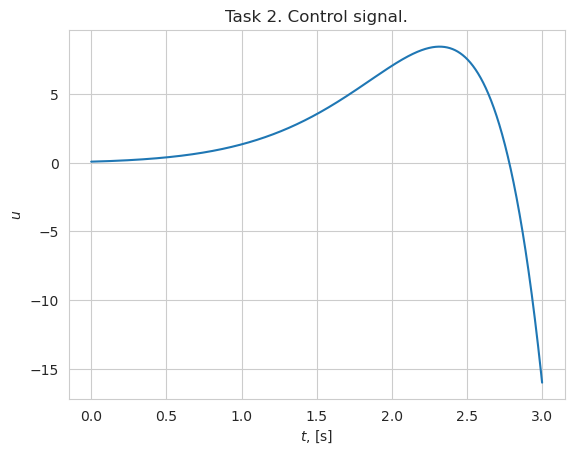

In [51]:
plt.plot(time_1,u_s_2)
plt.title("Task 2. Control signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$u$")
plt.grid(True)

## Task 3

In [52]:
A = np.array([
    [-9, 0, -10],
    [-4, -1, -6],
    [6, -2, 5]
])

C = np.array([[2, -1, 2]])

y = -3 * sympy.exp(-3*t)*sympy.cos(2*t) - 2*sympy.exp(-3*t)*sympy.sin(2*t)

In [53]:
y

-2*exp(-3*t)*sin(2*t) - 3*exp(-3*t)*cos(2*t)

### subtask 1

In [54]:
V = np.concatenate([C,C@A,C@A@A])
V

array([[ 2, -1,  2],
       [-2, -3, -4],
       [ 6, 11, 18]])

In [55]:
np.linalg.matrix_rank(V)

3

System is fully observable

### subtask 2

In [56]:
A_sym = sympy.Matrix(A)
C_sym = sympy.Matrix(C)
P, J = A_sym.jordan_form()
J.simplify()
J.evalf()

Matrix([
[1.0,            0,            0],
[  0, -3.0 - 2.0*I,            0],
[  0,            0, -3.0 + 2.0*I]])

In [57]:
P.simplify()
P.evalf()

Matrix([
[-1.0, -1.5 - 0.5*I, -1.5 + 0.5*I],
[-1.0, -0.5 - 0.5*I, -0.5 + 0.5*I],
[ 1.0,          1.0,          1.0]])

In [58]:
lambdas = [1, -3-2j, -3+2j]

for lambda_ in lambdas:
    rank = np.linalg.matrix_rank(
        np.concatenate(
            [(A - lambda_ * np.identity(3)), C.T],
            axis=1)
        )
    print(rank)

3
3
3


In [59]:
np.linalg.matrix_rank(np.concatenate([A-(-4+1j)*np.identity(3),C]))

3

method 2 (Jordan representation)

In [60]:
J

Matrix([
[1,        0,        0],
[0, -3 - 2*I,        0],
[0,        0, -3 + 2*I]])

In [61]:
C @ P

Matrix([[1, -1/2 - I/2, -1/2 + I/2]])

### subtask 3

In [62]:
G_obs = grammian_obs_sci(A,C,3)

In [63]:
G_obs = G_obs[0]
G_obs

array([[ 201.85388607, -201.75166827,  201.56584639],
       [-201.75166827,  201.73919406, -201.4764491 ],
       [ 201.56584639, -201.4764491 ,  201.30344773]])

In [64]:
np.linalg.eigvals(G_obs)

array([6.04828356e+02, 1.26325864e-02, 5.55396133e-02])

In [65]:
G_obs_sym = sympy.Matrix(G_obs)
G_obs_sym

Matrix([
[ 201.853886072088, -201.751668272713,  201.565846389252],
[-201.751668272713,  201.739194060589, -201.476449102888],
[ 201.565846389252, -201.476449102889,  201.303447731845]])

In [66]:
func = lambda x : scipy.linalg.expm(A.T*x) @ C.T * float(sympy.N(y.subs({t: x})))
x_0 = np.linalg.inv(G_obs) @ scipy.integrate.quad_vec(func,0,3)[0]

In [67]:
x_0

array([[-8.],
       [-3.],
       [ 5.]])

### subtask 5

system is fully observable, so it is impossible to have other initial conditions, corresponding to this trajectory

### subtask 6

In [68]:
system_3 = ctrl.ss(A,[[0],[0],[0]],C,0)
system_3

StateSpace(array([[ -9.,   0., -10.],
       [ -4.,  -1.,  -6.],
       [  6.,  -2.,   5.]]), array([[0.],
       [0.],
       [0.]]), array([[ 2., -1.,  2.]]), array([[0.]]))

In [69]:
time_3 = np.linspace(0,3,int(3/dt))
u_s_3 = np.zeros_like(time_3)
sys_out_3 = ctrl.forced_response(system_3,U=u_s_3,X0=x_0,T=time_3)

In [70]:
sys_out_3.states[:,0]

array([-8., -3.,  5.])

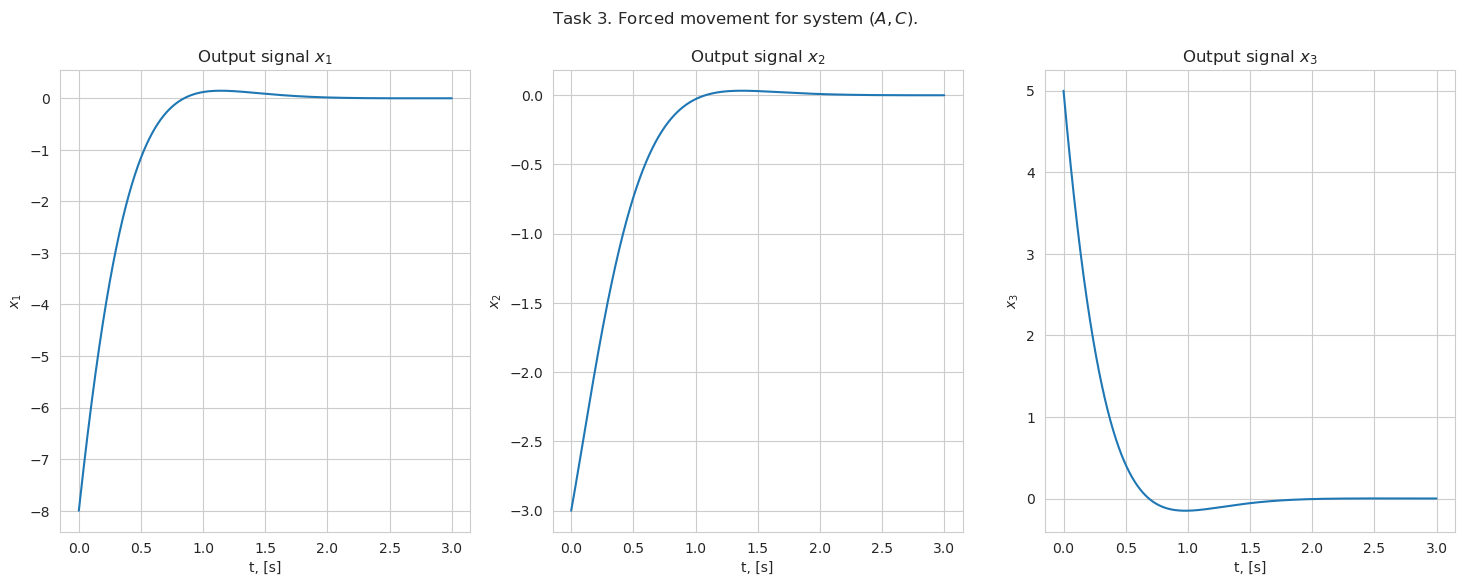

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 3. Forced movement for system $(A, C)$.")

for j in range(3):
    ax[j].plot(time_3, sys_out_3.states[j,:])
    ax[j].set_ylabel(f"$x_{j+1}$")
    ax[j].set_xlabel("t, [s]")
    ax[j].grid(True)
    ax[j].set_title(f"Output signal $x_{j+1}$")

In [72]:
y_func = lambdify(t,y,"numpy")

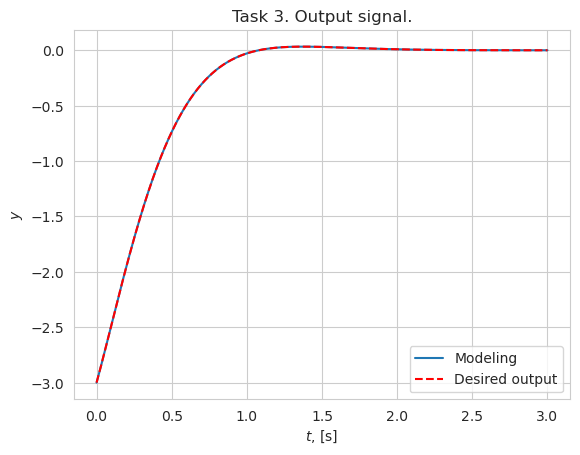

In [73]:
plt.plot(time_3,sys_out_3.outputs,label="Modeling")
plt.plot(time_3,y_func(time_3),"r--",label="Desired output")
plt.title("Task 3. Output signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid(True)
plt.legend()

## Task 4

In [74]:
A = np.array([
    [-9, 0, -10],
    [-4, -1, -6],
    [6, -2, 5]
])

C = np.array([[1, 0, 1]])

y = -3 * sympy.exp(-3*t)*sympy.cos(2*t) - 2*sympy.exp(-3*t)*sympy.sin(2*t)

In [75]:
y

-2*exp(-3*t)*sin(2*t) - 3*exp(-3*t)*cos(2*t)

### subtask 1

In [76]:
V = np.concatenate([C,C@A,C@A@A])
V

array([[ 1,  0,  1],
       [-3, -2, -5],
       [ 5, 12, 17]])

In [77]:
sympy.Matrix(V).nullspace()

[Matrix([
 [-1],
 [-1],
 [ 1]])]

In [78]:
np.linalg.matrix_rank(V)

2

System is not fully observable

### subtask 2

In [79]:
A_sym = sympy.Matrix(A)
C_sym = sympy.Matrix(C)
P, J = A_sym.jordan_form()
J

Matrix([
[1,        0,        0],
[0, -3 - 2*I,        0],
[0,        0, -3 + 2*I]])

In [80]:
P

Matrix([
[-1, -3/2 - I/2, -3/2 + I/2],
[-1, -1/2 - I/2, -1/2 + I/2],
[ 1,          1,          1]])

In [81]:
lambdas = [1, -3-2j, -3+2j]

for lambda_ in lambdas:
    rank = np.linalg.matrix_rank(
        np.concatenate(
            [(A - lambda_ * np.identity(3)), C],
            axis=0)
        )
    print(rank)

2
3
3


method 2 (Jordan representation)

In [82]:
J

Matrix([
[1,        0,        0],
[0, -3 - 2*I,        0],
[0,        0, -3 + 2*I]])

In [83]:
C @ P

Matrix([[0, -1/2 - I/2, -1/2 + I/2]])

1 is not observable

### subtask 3

In [84]:
G_obs = grammian_obs_sci(A,C,3)

In [85]:
G_obs = G_obs[0]
G_obs

array([[ 0.14102564, -0.03846154,  0.1025641 ],
       [-0.03846154,  0.02564103, -0.01282051],
       [ 0.1025641 , -0.01282051,  0.08974359]])

In [86]:
np.linalg.eigvals(G_obs)

array([ 2.28336530e-01, -2.50998607e-17,  2.80737215e-02])

### subtask 4

In [87]:
G_obs_sym = sympy.Matrix(G_obs)
G_obs_sym

Matrix([
[  0.141025638700714, -0.0384615384386967,  0.102564100262017],
[-0.0384615384386967,  0.0256410254276227, -0.012820513011074],
[  0.102564100262017,  -0.012820513011074, 0.0897435872509434]])

In [88]:
func = lambda x : scipy.linalg.expm(A.T*x) @ C.T * float(sympy.N(y.subs({t: x})))
x_0 = np.linalg.pinv(G_obs) @ scipy.integrate.quad_vec(func,0,3)[0]

In [89]:
x_0

array([[-2.66666667],
       [ 2.33333333],
       [-0.33333333]])

### subtask 5

system is fully observable, so it is impossible to have other initial conditions, corresponding to this trajectory

### subtask 6

add linear subspace based on vector [-1, -1, 1] from unobservable space

In [90]:
system_4 = ctrl.ss(A,[[0],[0],[0]],C,0)
system_4

StateSpace(array([[ -9.,   0., -10.],
       [ -4.,  -1.,  -6.],
       [  6.,  -2.,   5.]]), array([[0.],
       [0.],
       [0.]]), array([[1., 0., 1.]]), array([[0.]]))

In [91]:
time_4 = np.linspace(0,3,int(3/dt))
u_s_4 = np.zeros_like(time_4)
sys_out_4 = ctrl.forced_response(system_4,U=u_s_4,X0=x_0,T=time_4)

In [92]:
sys_out_4.states[:,0]

array([-2.66666667,  2.33333333, -0.33333333])

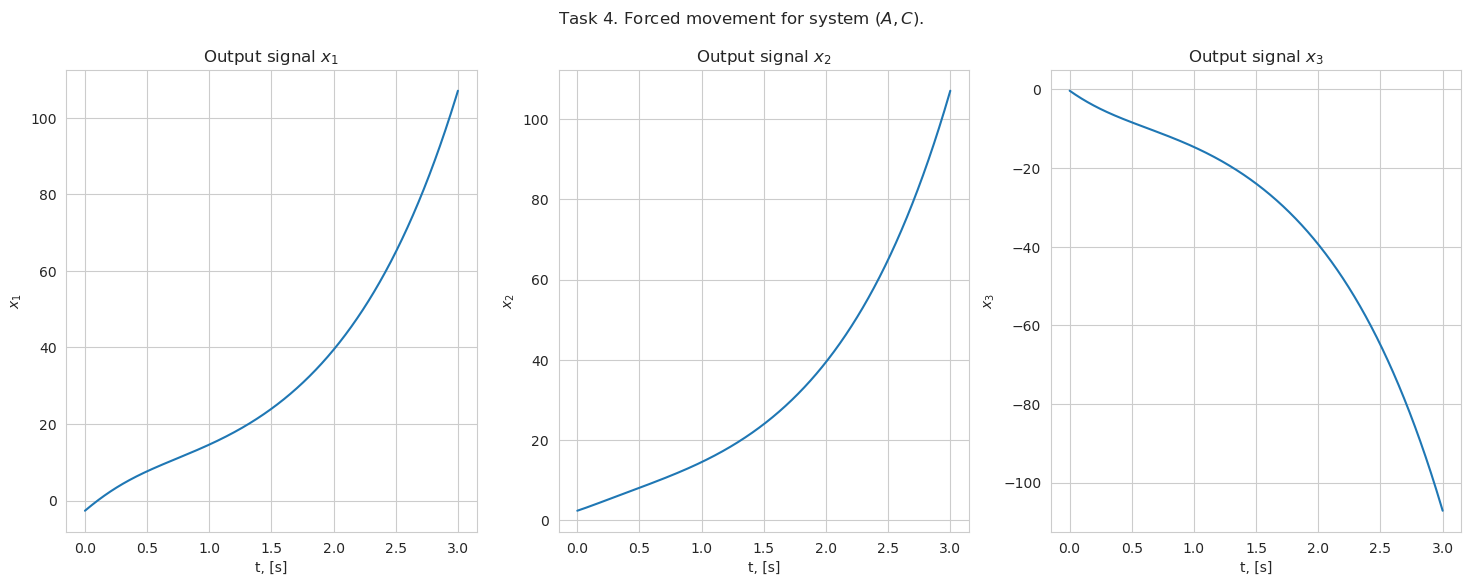

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 4. Forced movement for system $(A, C)$.")

for j in range(3):
    ax[j].plot(time_4, sys_out_4.states[j,:])
    ax[j].set_ylabel(f"$x_{j+1}$")
    ax[j].set_xlabel("t, [s]")
    ax[j].grid(True)
    ax[j].set_title(f"Output signal $x_{j+1}$")

In [94]:
y_func = lambdify(t,y,"numpy")

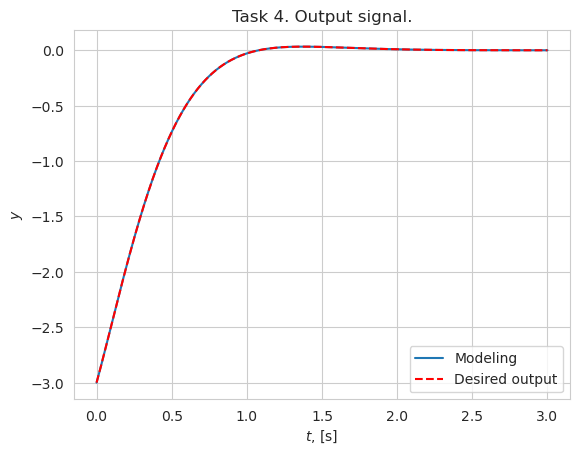

In [95]:
plt.plot(time_4,sys_out_4.outputs,label="Modeling")
plt.plot(time_4,y_func(time_4),"r--",label="Desired output")
plt.title("Task 4. Output signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid(True)
plt.legend()

In [96]:
sys_out_4 = ctrl.forced_response(system_4,U=u_s_4,X0=x_0+10*np.array([-1,-1,1]).reshape((-1,1)),T=time_4)

In [97]:
x_0+10*np.array([-1,-1,1]).reshape((-1,1))

array([[-12.66666667],
       [ -7.66666667],
       [  9.66666667]])

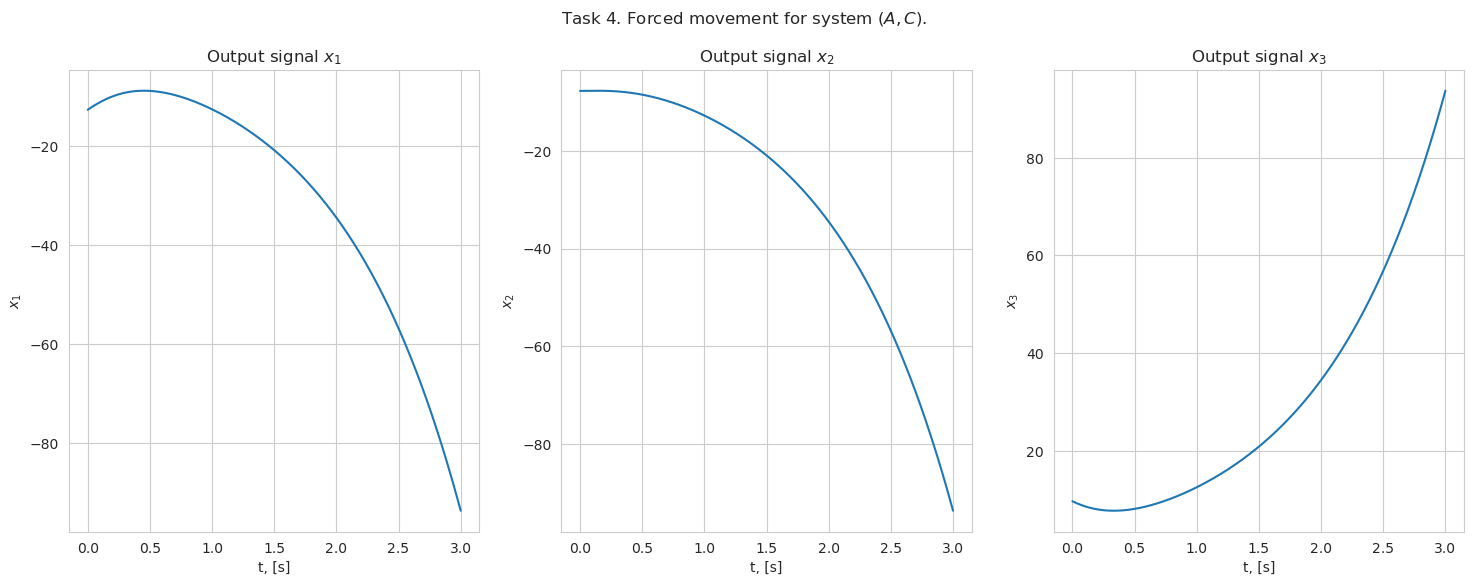

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 4. Forced movement for system $(A, C)$.")

for j in range(3):
    ax[j].plot(time_4, sys_out_4.states[j,:])
    ax[j].set_ylabel(f"$x_{j+1}$")
    ax[j].set_xlabel("t, [s]")
    ax[j].grid(True)
    ax[j].set_title(f"Output signal $x_{j+1}$")

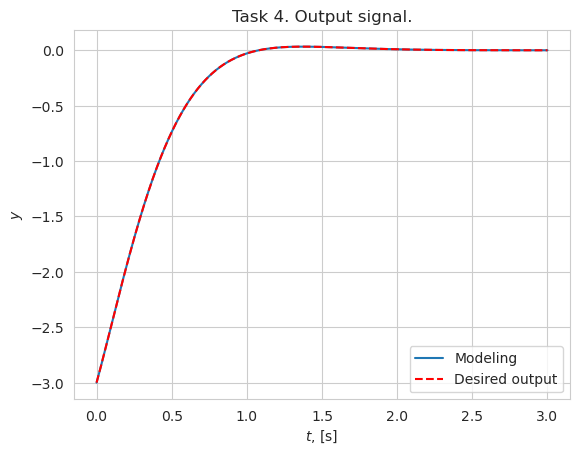

In [99]:
plt.plot(time_4,sys_out_4.outputs,label="Modeling")
plt.plot(time_4,y_func(time_4),"r--",label="Desired output")
plt.title("Task 4. Output signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid(True)
plt.legend()

In [100]:
x_0-20*np.array([-1,-1,1]).reshape((-1,1))

array([[ 17.33333333],
       [ 22.33333333],
       [-20.33333333]])

In [101]:
sys_out_4 = ctrl.forced_response(system_4,U=u_s_4,X0=x_0-20*np.array([-1,-1,1]).reshape((-1,1)),T=time_4)

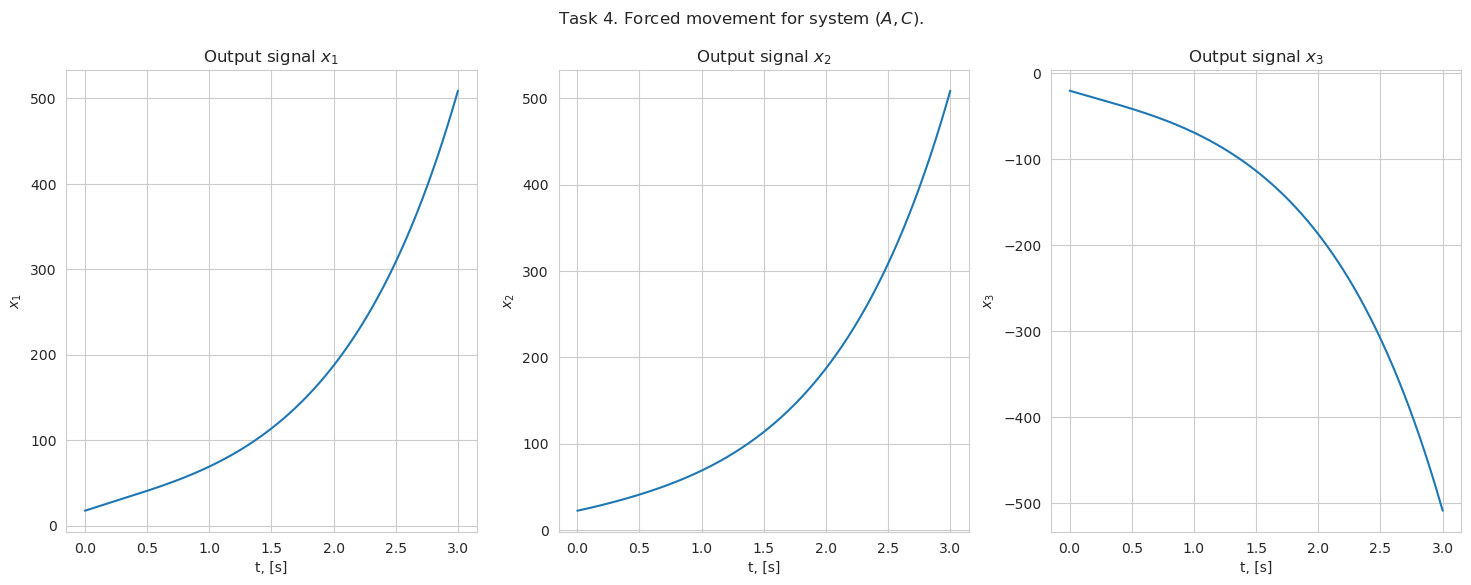

In [102]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Task 4. Forced movement for system $(A, C)$.")

for j in range(3):
    ax[j].plot(time_4, sys_out_4.states[j,:])
    ax[j].set_ylabel(f"$x_{j+1}$")
    ax[j].set_xlabel("t, [s]")
    ax[j].grid(True)
    ax[j].set_title(f"Output signal $x_{j+1}$")

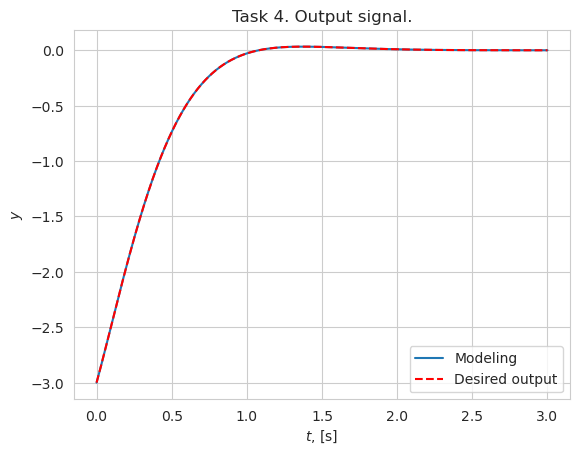

In [103]:
plt.plot(time_4,sys_out_4.outputs,label="Modeling")
plt.plot(time_4,y_func(time_4),"r--",label="Desired output")
plt.title("Task 4. Output signal.")
plt.xlabel(f"$t$, [s]")
plt.ylabel(f"$y$")
plt.grid(True)
plt.legend()